# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

## Inicialización

In [ ]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


### Cargar datos

In [ ]:
# Carga el archivo de datos en un DataFrame
df = pd.read_csv('/datasets/vehicles_us.csv')


### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina



In [ ]:
# imprime la información general/resumida sobre el DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [ ]:
# imprimir una muestra de datos
df.head()



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


- El dataset cuenta con 13 columnas y 51525 filas

- El dataset presenta varias columnas con valores ausentes: model year, cilinder, odometer, paint color, is4wd. En el caso de iswd, la cantidad de datos ausentes representa casi la mitad del total de valores

### Conclusiones y siguientes pasos



- Los datos presentan tipos de variables que deben ser corregidas:
    - El tipo de datos de 'date posted' debera convertirse a daytime 
    - El tipo de datos de  'model_year', 'cylinders' y 'odometer' seran convertidas al tipo int
    - EL tipo de datos de 'is_wd' sera convertido a float

- Debera estudiarse los valores ausentes en profundidad para poder definir su tratamiento. En el caso de is_4wd la ausencia de valores tan elevada aparenta coincidir con los valores que corresponden a ceros. 

## Tratar los valores ausentes (si hay)

In [ ]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

1.2.1 Estudiamos los ausentes de is_4wd.

In [ ]:
df['is_4wd'].unique()


array([ 1., nan])

In [ ]:
df[df['is_4wd'].isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,NaN,2019-03-28,29


- Los valores ausentes Nan, parecieran ser los correspondientes a valores 0. Reemplazamos los NaN por 0

In [ ]:
df['is_4wd'] = df['is_4wd'].fillna(int(0))



- Verificamos que se han completado todos los valores nulos de 'is_4wd'

In [ ]:
df['is_4wd'].unique()

array([1., 0.])

In [ ]:
df['is_4wd'].isna().sum()

0

1.2.2- Reemplazamos los valores ausentes de  'paint color' por "unknown"

In [ ]:
df['paint_color'] = df['paint_color'].fillna('unknown')
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


1.2.3- Rellenamos los valores ausentes de 'cylinder' por promedio de cilindrada por tipo de modelo

In [ ]:
df['cylinders'].unique()

array([ 6.,  4.,  8., nan,  5., 10.,  3., 12.])

In [ ]:
#Creamos una funcion para rellenar valores ausentes de cylinders a partir del tipo de modelo

df_aux_cylinder = df.groupby('model')['cylinders'].mean()


def nan_odometer (row, series_groupby):
  cylinders_i = row['cylinders']
  modelo_i = row['model']

  if np.isnan(cylinders_i):
    return round(series_groupby[modelo_i])
  else:
    return cylinders_i

df['cylinders'] = df.apply(lambda var:nan_odometer(var, df_aux_cylinder), axis = 1)
df['cylinders'].unique()

array([ 6.,  4.,  8.,  5.,  7., 10.,  3.,  9., 12.])

1.2.4 - Rellenamos valores ausentes de model year a partir del nombre del modelo

In [ ]:
df_aux_model_year = df.groupby('model')['model_year'].mean()


def nan_model_year (row, series_groupby):
  model_year_i = row['model_year']
  modelo_i = row['model']

  if np.isnan(model_year_i):
    return round(series_groupby[modelo_i])
  else:
    return model_year_i

df['model_year'] = df.apply(lambda var:nan_model_year(var, df_aux_model_year), axis = 1)
df['model_year'].unique()

array([2011., 2009., 2013., 2003., 2017., 2014., 2015., 2012., 2008.,
       2018., 2010., 2007., 2004., 2005., 2001., 2006., 1966., 1994.,
       2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981., 1995.,
       1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990., 1992.,
       1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965., 1979.,
       1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973., 1970.,
       1955., 1971., 1976., 1983., 1954., 1962., 1948., 1960., 1908.,
       1961., 1936., 1949., 1958., 1929.])

1.2.5 - Rellenamos valores ausentes de 'odometer' a partir 'condition'

In [ ]:
df_aux_odometer = df.groupby('condition')['odometer'].mean()


def nan_odometer (row, series_groupby):
  odometer_i = row['odometer']
  condition_i = row['condition']

  if np.isnan(odometer_i):
    return round(series_groupby[condition_i])
  else:
    return odometer_i

df['odometer'] = df.apply(lambda var:nan_odometer(var, df_aux_odometer), axis = 1)
df['odometer'].unique()

array([145000.,  88705., 110000., ..., 121778., 181500., 139573.])

## Corregir los tipos de datos

- Corregimos el tipo de dato de las columnas days_posted, model_year, cylinders y is_4wd

In [ ]:
#"date posted" to datetime
df['date_posted']= pd.to_datetime(df['date_posted'], format = '%Y-%m-%d')


In [ ]:
#"model year" to integer
df['model_year'] = df['model_year'].astype('int')
df['model_year'].unique()

array([2011, 2009, 2013, 2003, 2017, 2014, 2015, 2012, 2008, 2018, 2010,
       2007, 2004, 2005, 2001, 2006, 1966, 1994, 2019, 2000, 2016, 1993,
       1999, 1997, 2002, 1981, 1995, 1996, 1975, 1998, 1985, 1977, 1987,
       1974, 1990, 1992, 1991, 1972, 1967, 1988, 1969, 1989, 1978, 1965,
       1979, 1968, 1986, 1980, 1964, 1963, 1984, 1982, 1973, 1970, 1955,
       1971, 1976, 1983, 1954, 1962, 1948, 1960, 1908, 1961, 1936, 1949,
       1958, 1929])

In [ ]:
#"cylinders" to integer
df['cylinders'] = df['cylinders'].astype('int')
df['cylinders'].unique()

array([ 6,  4,  8,  5,  7, 10,  3,  9, 12])

In [ ]:
#"is_wd4" to boolean
df['is_4wd'] = df['is_4wd'].astype('bool')
df['is_4wd'].unique()

array([ True, False])

In [ ]:
#comprobando correcciones de tipo de datos y valores ausentes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 4.8+ MB


## Enriquecer datos

- Agregamos Columnas con, dia de la semana, año y mes en que se coloco el anuncio


In [ ]:

df['weekday_posted'] = pd.DatetimeIndex(df['date_posted']).dayofweek
df['weekday_posted'].unique()

array([5, 4, 3, 1, 2, 0, 6])

In [ ]:

df['year_posted'] = pd.DatetimeIndex(df['date_posted']).year
df['year_posted'].unique()


array([2018, 2019])

In [ ]:
df['month_posted'] = pd.DatetimeIndex(df['date_posted']).month
df['month_posted'].unique()


array([ 6, 10,  2,  3,  4, 12,  1,  7,  9,  5,  8, 11])

- Creamos una columna con los años del vehiculo cuando se publico


In [ ]:
df['years_when_published'] = df['year_posted']- df['model_year']
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,years_when_published
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,5,2018,6,7
1,25500,2009,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,2018,10,9
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2019,2,6
3,1500,2003,ford f-150,fair,8,gas,183062.0,automatic,pickup,unknown,False,2019-03-22,9,4,2019,3,16
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,2019,4,2


- Calculamos el promdeio de millaje segun el año

In [ ]:
# Agrega el millaje promedio del vehículo por año

df_aux_avg_odo = df.groupby('model_year')['odometer'].mean()

def average_odo (model_year_i):
  return df_aux_avg_odo[model_year_i]

df['average_odometer'] = df['model_year'].apply(average_odo)
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,years_when_published,average_odometer
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,5,2018,6,7,122071.619629
1,25500,2009,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,2018,10,9,128858.696873
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2019,2,6,104904.128579
3,1500,2003,ford f-150,fair,8,gas,183062.0,automatic,pickup,unknown,False,2019-03-22,9,4,2019,3,16,156303.847423
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,2019,4,2,56753.936275


- Creamos una funcion para crear la columna "condition_id"

In [ ]:
diccionario = {'new': 5,'like new': 4, 'excellent': 3, 'good': 2, 'fair': 1, 'salvage': 0}
def correccion_condition (i):
  return diccionario[i]
df['condition_id'] = df['condition'].apply(correccion_condition)

df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,years_when_published,average_odometer,condition_id
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,5,2018,6,7,122071.619629,2
1,25500,2009,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,2018,10,9,128858.696873,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2019,2,6,104904.128579,4
3,1500,2003,ford f-150,fair,8,gas,183062.0,automatic,pickup,unknown,False,2019-03-22,9,4,2019,3,16,156303.847423,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,2019,4,2,56753.936275,3


## Comprobar datos limpios

- Comprobamos que los datos quedaron correctamente corregidos: sin valores ausentes y con el tipod e dato correcto

In [ ]:
# imprime la información general/resumida sobre el DataFrame
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   price                 51525 non-null  int64         
 1   model_year            51525 non-null  int64         
 2   model                 51525 non-null  object        
 3   condition             51525 non-null  object        
 4   cylinders             51525 non-null  int64         
 5   fuel                  51525 non-null  object        
 6   odometer              51525 non-null  float64       
 7   transmission          51525 non-null  object        
 8   type                  51525 non-null  object        
 9   paint_color           51525 non-null  object        
 10  is_4wd                51525 non-null  bool          
 11  date_posted           51525 non-null  datetime64[ns]
 12  days_listed           51525 non-null  int64         
 13  weekday_posted  

In [ ]:
# imprimir una muestra de datos

df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,years_when_published,average_odometer,condition_id
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,5,2018,6,7,122071.619629,2
1,25500,2009,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,2018,10,9,128858.696873,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2019,2,6,104904.128579,4
3,1500,2003,ford f-150,fair,8,gas,183062.0,automatic,pickup,unknown,False,2019-03-22,9,4,2019,3,16,156303.847423,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,2019,4,2,56753.936275,3


## Estudiar parámetros principales



Los parámetros a estudiar son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

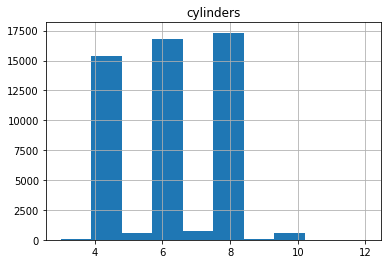

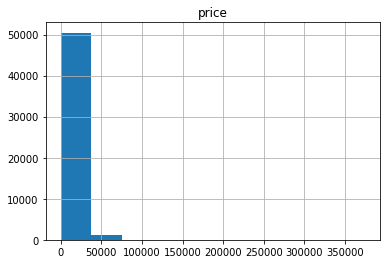

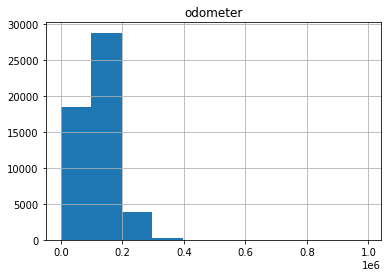

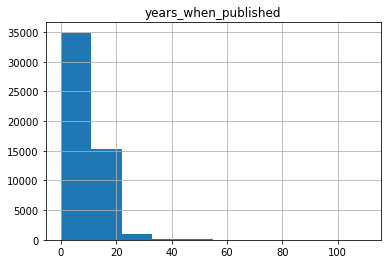

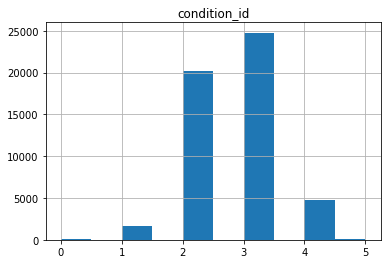

In [ ]:
##Creamos histogramas para cada una de las variables de interes (utilizando un bucle para no repetir codigo)

lista = ['cylinders', 'price', 'odometer', 'years_when_published', 'condition_id']
for i in lista:
    df.hist( column = i)

## Estudiar y tratar valores atípicos



A partir de los histogramas anteriores, se puede inferir que las variables de precio, millaje y año de publicacion cuentan con valoes atipicos. 
Calculamos para cada variable los limites para el rango normal de valores

In [ ]:
#Price Limits

Q2_price = df['price'].median()
print("Q2_price=", Q2_price)
Q1_price = df[df['price']<=Q2_price]['price'].median()
print("Q1_price=", Q1_price)
Q3_price = df[df['price']>=Q2_price]['price'].median()
print("Q3_price=", Q3_price)
IQR_price = Q3_price-Q1_price
print("IQR_price=", IQR_price)
print('Limite inferior precio', max(0,Q1_price-1.5*IQR_price))
print('Limite superior precio', Q3_price+1.5*IQR_price)

Q2_price= 9000.0
Q1_price= 5000.0
Q3_price= 16795.0
IQR_price= 11795.0
Limite inferior precio 0
Limite superior precio 34487.5


In [ ]:
#ODOMETER LIMITS
Q2_odometer = df['odometer'].median()
print("Q2_odometer=", Q2_odometer )
Q1_odometer = df[df['odometer']<=Q2_odometer]['odometer'].median()
print("Q1_odometer=", Q1_odometer)
Q3_odometer = df[df['odometer']>=Q2_odometer]['odometer'].median()
print("Q3_odometer=", Q3_odometer)
IQR_odometer = Q3_odometer-Q1_odometer
print("IQR_odometer=", IQR_odometer)
print('Limite inferior odometer', max(0,Q1_odometer-1.5*IQR_odometer))
print('Limite superior odometer', Q3_odometer+1.5*IQR_odometer)


Q2_odometer= 110908.0
Q1_odometer= 79009.0
Q3_odometer= 147821.0
IQR_odometer= 68812.0
Limite inferior odometer 0
Limite superior odometer 251039.0


In [ ]:
##years_when_published  LIMITS
Q2_years_when_published = df['years_when_published'].median()
print("Q2_years_when_published=", Q2_years_when_published )
Q1_years_when_published = df[df['years_when_published']<=Q2_years_when_published]['years_when_published'].median()
print("Q1_years_when_published=", Q1_years_when_published)
Q3_years_when_published = df[df['years_when_published']>=Q2_years_when_published]['years_when_published'].median()
print("Q3_years_when_published=", Q3_years_when_published)
IQR_years_when_published = Q3_years_when_published-Q1_years_when_published
print("IQR_years_when_published=", IQR_years_when_published)
print('Limite inferior years_when_published', max(0,Q1_years_when_published-1.5*IQR_years_when_published))
print('Limite superior years_when_published', Q3_years_when_published+1.5*IQR_years_when_published)

Q2_years_when_published= 8.0
Q1_years_when_published= 5.0
Q3_years_when_published= 12.0
IQR_years_when_published= 7.0
Limite inferior years_when_published 0
Limite superior years_when_published 22.5


In [ ]:
###cylinders limits
Q2_cylinders = df['cylinders'].median()
print("Q2_cylinders=", Q2_cylinders)
Q1_cylinders = df[df['cylinders']<=Q2_cylinders]['cylinders'].median()
print("Q1_cylinders=", Q1_cylinders)
Q3_cylinders = df[df['cylinders']>=Q2_cylinders]['cylinders'].median()
print("Q3_cylinders=", Q3_cylinders)
IQR_cylinders = Q3_cylinders-Q1_cylinders
print("IQR_cylinders=", IQR_cylinders)
print('Limite inferior precio', max(0,Q1_cylinders-1.5*IQR_cylinders))
print('Limite superior precio', Q3_cylinders+1.5*IQR_cylinders)

Q2_cylinders= 6.0
Q1_cylinders= 6.0
Q3_cylinders= 8.0
IQR_cylinders= 2.0
Limite inferior precio 3.0
Limite superior precio 11.0



- Almacenamos los datos sin valores atipicos


In [ ]:
df_filtered= df.query(f'price<={Q3_price+1.5*IQR_price} and odometer <= {Q3_odometer+1.5*IQR_odometer} and years_when_published <= {Q3_years_when_published+1.5*IQR_years_when_published} and cylinders <={Q3_cylinders+1.5*IQR_cylinders}')
df_filtered.max()

price                                 34429
model_year                             2019
model                     volkswagen passat
condition                           salvage
cylinders                                10
fuel                                  other
odometer                           251000.0
transmission                          other
type                                  wagon
paint_color                          yellow
is_4wd                                 True
date_posted             2019-04-19 00:00:00
days_listed                             271
weekday_posted                            6
year_posted                            2019
month_posted                             12
years_when_published                     22
average_odometer              175260.761905
condition_id                              5
dtype: object

## Estudiar parámetros principales sin valores atípicos

- Creamos histogramas para cada variable con los datos sin valores atipicos

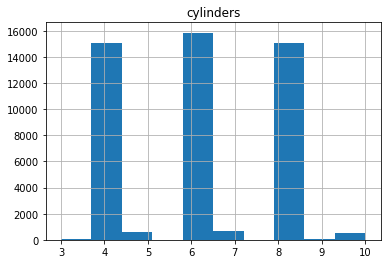

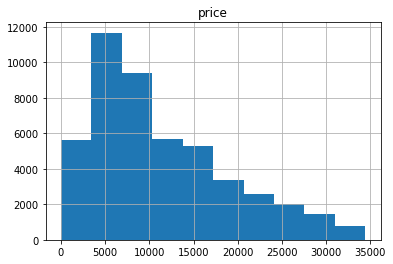

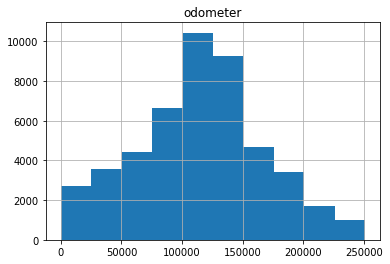

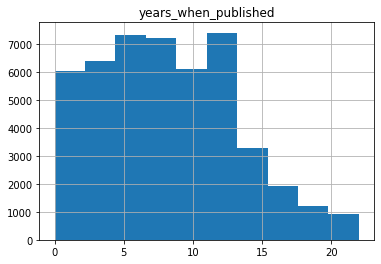

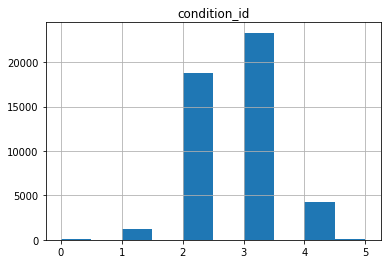

In [ ]:
for i in lista:
    df_filtered.hist( column = i)

## Periodo de colocación de los anuncios



- Estudiamos cuántos días los anuncios fueron mostrados (days_listed).

<AxesSubplot:>

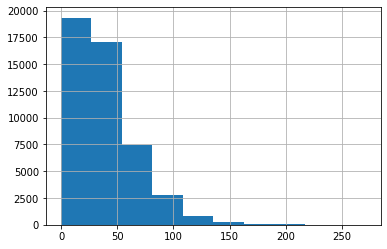

In [ ]:
df_filtered['days_listed'].hist()

- Calculamos la media y la mediana

In [ ]:
df_filtered['days_listed'].mean()

39.5477648435704

In [ ]:
df_filtered['days_listed'].median()

33.0

- Calculamos el rango de valores normales

In [ ]:
##calculamos el rango de valores habituales

Q2_days_listed = df_filtered['days_listed'].median()

Q1_days_listed = df_filtered[df_filtered['days_listed']<=Q2_days_listed]['days_listed'].median()

Q3_days_listed = df_filtered[df_filtered['price']>=Q2_days_listed]['days_listed'].median()

IQR_days_listed = Q3_days_listed-Q1_days_listed

print('Limite inferior days_listed', max(0,Q1_days_listed-1.5*IQR_days_listed))
print('Limite superior days_listed', Q3_days_listed+1.5*IQR_days_listed)

Limite inferior days_listed 0
Limite superior days_listed 54.0


- El limite superiors de valores normales es 54. Tomamos dicho rango para evaluar la media de dias publicados

26.561759305625106

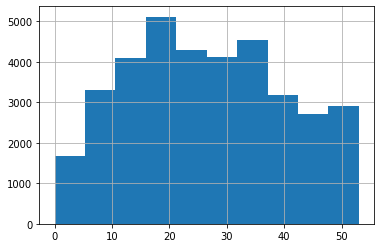

In [ ]:
df_filtered[df_filtered['days_listed'] < 54]['days_listed'].hist()
df_filtered[df_filtered['days_listed'] < 54]['days_listed'].mean()

- La media de dias de publicacion es de 26,5 dias

## Precio promedio por cada tipo de vehículo

In [ ]:
#Calculamos precio promedio por cada tipo de vehiculo 
price_table = df.groupby('model').agg({'price':['count', 'mean']})
price_table=price_table.reset_index()



In [ ]:
price_table.columns=['model', 'amount','price']
price_table

,model,amount,price
0,acura tl,236,6474.500000
1,bmw x5,267,10695.891386
2,buick enclave,271,11439.612546
3,cadillac escalade,322,17032.059006
4,chevrolet camaro,414,13284.961353
...,...,...,...
95,toyota sienna,329,9046.838906
96,toyota tacoma,827,15473.817412
97,toyota tundra,603,14715.633499
98,volkswagen jetta,519,6426.240848


<AxesSubplot:xlabel='model', ylabel='amount'>

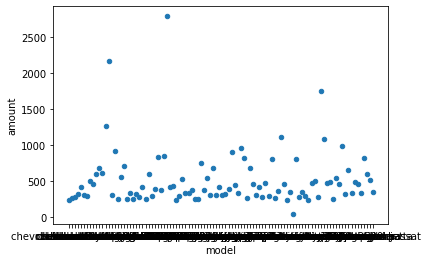

In [ ]:
#trazamos grafico de dispersion para evaluar la relacion entre variables
price_table.plot(x='model', y='amount', kind='scatter')

In [ ]:
#Calculamos los modelos con mayor cantidad de anuncios
price_table.sort_values(by='amount', ascending = False).head(2)
total_amount = price_table['amount'].sum()
price_table['porcentaje'] = price_table['amount']/total_amount
price_table.sort_values(by='amount', ascending = False).head(2)

,model,amount,price,porcentaje
32,ford f-150,2796,14105.922747,0.054265
13,chevrolet silverado 1500,2171,15629.868263,0.042135


- Los modelos con mas cantidad de anuncions son ford f-150 (5,4%) y chevrolet silverado 1500 (4,2%)

## Factores de precio

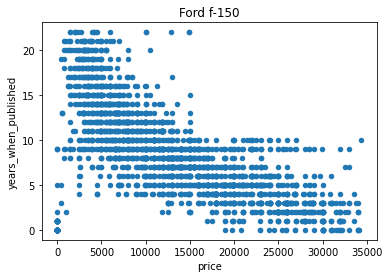

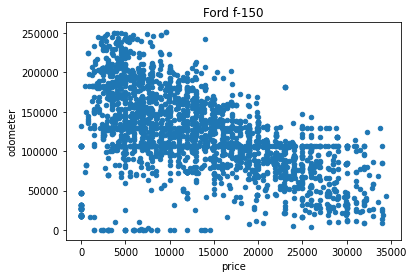

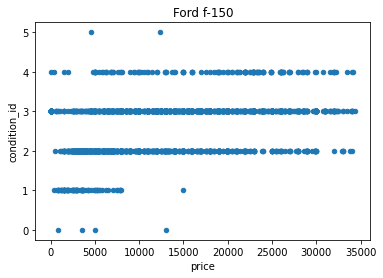

In [ ]:
#Graficamos dispersion para modelo ford para las variables no categoricas utilizando el df sin valores atipicos (df_filtered)

df_ford = df_filtered[df_filtered['model']=="ford f-150"]
list_ford_stats = ['years_when_published', 'odometer', 'condition_id']
for i in list_ford_stats:
    df_ford.plot(x = 'price', y = i , kind = 'scatter', title = 'Ford f-150')

In [ ]:
#Calculamos indices de correlacion
df_ford[['price','years_when_published', 'odometer', 'condition_id']].corr()

,price,years_when_published,odometer,condition_id
price,1.000000,-0.675145,-0.484214,0.359728
years_when_published,-0.675145,1.000000,0.486251,-0.379565
odometer,-0.484214,0.486251,1.000000,-0.348171
condition_id,0.359728,-0.379565,-0.348171,1.000000


- Trazamos diagramas de cajas para los colores con mas de 50 anuncios (de ford f-150)

In [ ]:
#Calculamos la cantidad de anuncios por color (para el modelo ford)

aux_colors = df_ford.groupby('paint_color')['price'].count()
aux_colors = aux_colors.reset_index()
aux_colors.columns=['paint_color', 'amount']
aux_colors


,paint_color,amount
0,black,357
1,blue,190
2,brown,57
3,custom,52
4,green,73
5,grey,201
6,orange,1
7,purple,1
8,red,309
9,silver,197


In [ ]:
#buscamos los colores con mas de 50 anuncios
color_list = aux_colors.query('amount > 50')['paint_color'].unique()
color_list

array(['black', 'blue', 'brown', 'custom', 'green', 'grey', 'red',
       'silver', 'unknown', 'white'], dtype=object)

<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

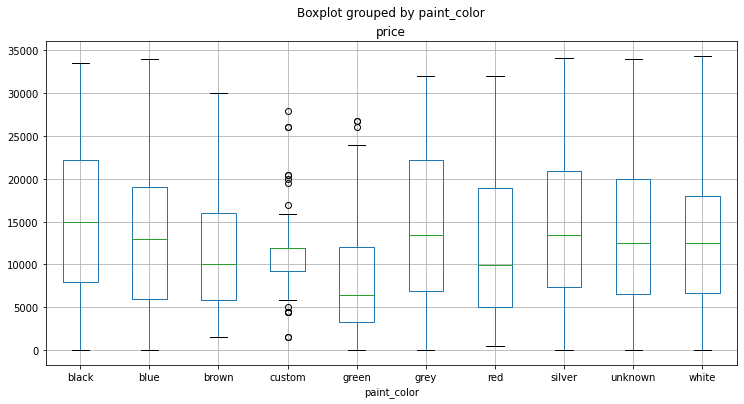

In [ ]:
#Diagrama de caja para la lista de colores (que contienen mas de 50 anuncios)
df_ford.query('paint_color in @color_list').boxplot(column = 'price', by = 'paint_color', figsize = (12, 6))





- Se observan valores atipico, por lo que procedemos a calcular el rango de valores normales

In [ ]:
#Calculando rango de valores normales para color custom y green

df_custom = df_ford.query('paint_color == "custom"')
Q2_custom = df_custom['price'].median()
Q1_custom = df_custom[df_custom['price']<=Q2_custom]['price'].median()
Q3_custom = df_custom[df_custom['price']>=Q2_custom]['price'].median()
IQR_custom = Q3_custom-Q1_custom

print('Limite inferior Ford custom color', max(0,Q1_custom-1.5*IQR_custom))
print('Limite superior Ford custom color',Q3_custom+1.5*IQR_custom)

Limite inferior Ford custom color 7025.0
Limite superior Ford custom color 14825.0


In [ ]:
#Calculando rango de valores normales para color  green

df_green = df_ford.query('paint_color == "green"')
Q2_green = df_green['price'].median()
Q1_green = df_green[df_green['price']<=Q2_green]['price'].median()
Q3_green = df_green[df_green['price']>=Q2_green]['price'].median()
IQR_green = Q3_green-Q1_green

print('Limite inferior Ford green color', max(0,Q1_green-1.5*IQR_green))
print('Limite superior Ford green color',Q3_green+1.5*IQR_green)

Limite inferior Ford green color 0
Limite superior Ford green color 25047.5


<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

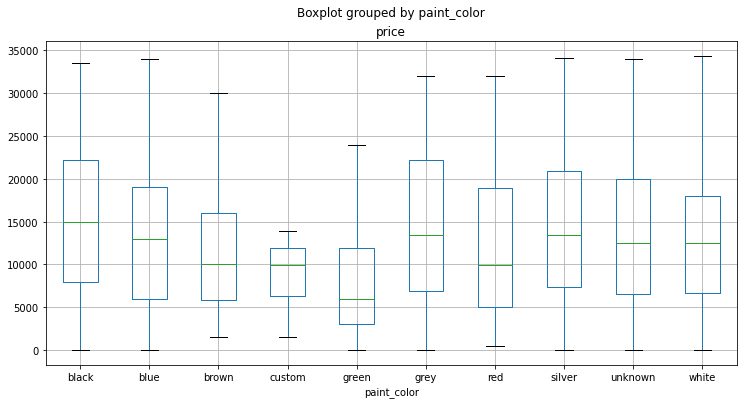

In [ ]:
#Filtramos los valores atipico y trazamos nuevamente diagramas de cajas
df_aux_custom = df_ford.loc[~((df_ford['paint_color']=='custom')&(df_ford['price']>= Q3_custom+1.5*IQR_custom))]
df_aux_green =  df_aux_custom.loc[~((df_aux_custom['paint_color']=='green')&(df_aux_custom['price']>= Q3_green+1.5*IQR_green))]

df_aux_green.query('paint_color in @color_list').boxplot(column = 'price', by = 'paint_color', figsize = (12, 6))




-Trazamos diagamas de caja para el tipo de trasmision con mas de 50 anuncios(el modelo FOrd f -150)

In [ ]:
#comprobamos que las categorias de transmision tengan mas de 50 anuncion
aux_4wd = df_ford.groupby('is_4wd')['price'].count()
aux_4wd

is_4wd
False     666
True     1907
Name: price, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='is_4wd'>

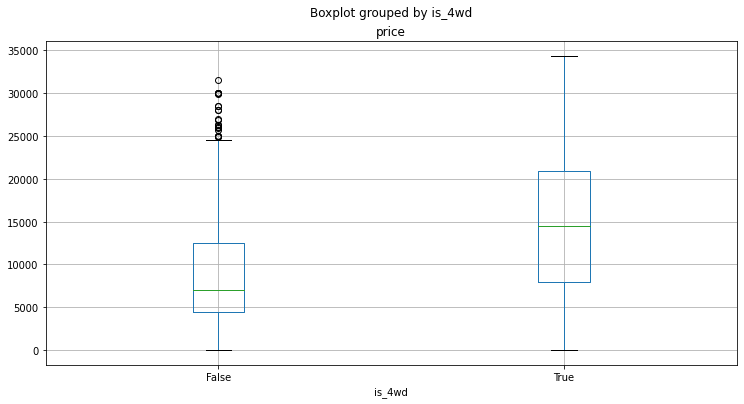

In [ ]:
df_ford.boxplot(column = 'price', by = 'is_4wd', figsize = (12, 6))

In [ ]:
## calculamos rango de valores normales para tipo de transmision del modelo FOrd = False


df_is4wd = df_ford.query('is_4wd == False')
Q2_is4wd = df_is4wd['price'].median()
Q1_is4wd = df_is4wd[df_is4wd['price']<=Q2_is4wd]['price'].median()
Q3_is4wd = df_is4wd[df_is4wd['price']>=Q2_is4wd]['price'].median()
IQR_is4wd = Q3_is4wd-Q1_is4wd

print('Limite inferior Ford is4wd False', max(0,Q1_is4wd-1.5*IQR_is4wd))
print('Limite superior Ford is4wd False',Q3_is4wd+1.5*IQR_is4wd)



Limite inferior Ford is4wd False 0
Limite superior Ford is4wd False 24500.0


<AxesSubplot:title={'center':'price'}, xlabel='is_4wd'>

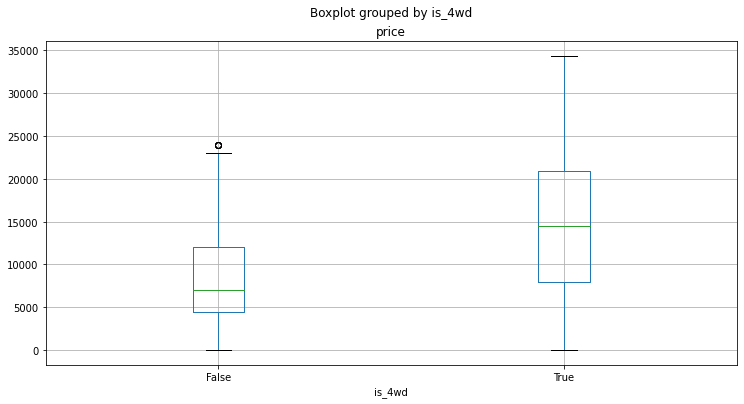

In [ ]:
## filtrando valores atipicos

df_aux_true = df_ford.loc[~((df_ford['is_4wd']== False)&(df_ford['price']>= Q3_is4wd+1.5*IQR_is4wd))]

df_aux_true.boxplot(column = 'price', by = 'is_4wd', figsize = (12, 6))





- El grafico de cajas sin valores atipico permite concluir que aquellos vehiculos de la marca ford con transmision 4wd tienen una media de precio superior a la de aquellos que no la tienen

- Analizamos las variables para Chevrolet

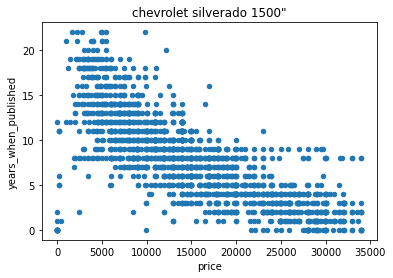

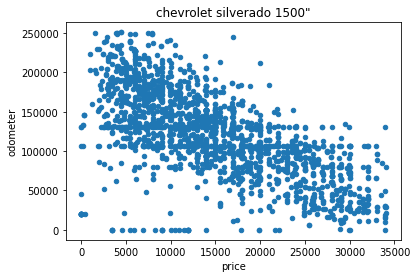

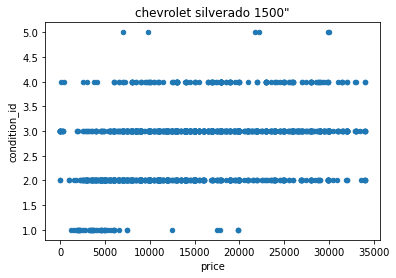

In [ ]:
#Graficamos dispersion para modelo ford para las variables no categoricas utilizando el df sin valores atipicos (df_filtered)


df_chev = df_filtered[df_filtered['model']=="chevrolet silverado 1500"]
list_chev_stats = ['years_when_published', 'odometer', 'condition_id']
for i in list_chev_stats:
    df_chev.plot(x = 'price', y = i , kind = 'scatter', title = 'chevrolet silverado 1500"')

Se observa una correlacion negativa entre el precio y el milllaje y la antiguedad

In [ ]:
#Calculamos indices de correlacion
df_chev[['price','years_when_published', 'odometer', 'condition_id']].corr()

,price,years_when_published,odometer,condition_id
price,1.000000,-0.750609,-0.629762,0.323451
years_when_published,-0.750609,1.000000,0.546899,-0.279242
odometer,-0.629762,0.546899,1.000000,-0.323690
condition_id,0.323451,-0.279242,-0.323690,1.000000


In [ ]:
## Calculamos la cantidad de anuncios por tipo de color para chevrolet

aux_chev_color = df_chev.groupby('paint_color')['price'].count()
aux_chev_color = aux_chev_color.reset_index()
aux_chev_color.columns=['paint_color', 'amount']
aux_chev_color

,paint_color,amount
0,black,292
1,blue,170
2,brown,36
3,custom,51
4,green,36
5,grey,185
6,orange,2
7,purple,2
8,red,195
9,silver,193


In [ ]:
color_chev_list = aux_chev_color.query('amount > 50')['paint_color'].unique()
color_chev_list

array(['black', 'blue', 'custom', 'grey', 'red', 'silver', 'unknown',
       'white'], dtype=object)

<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

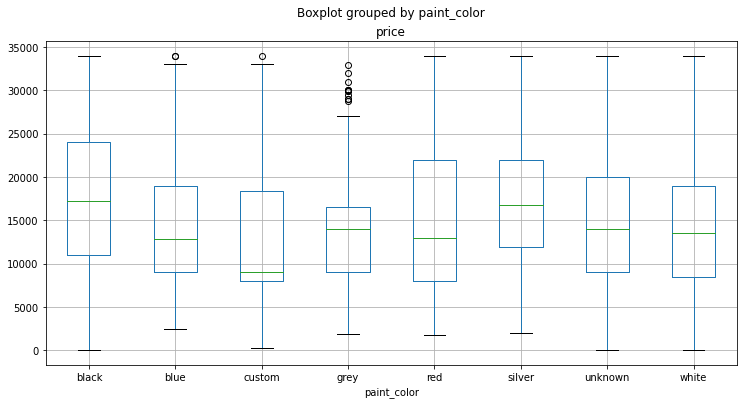

In [ ]:
df_chev.query('paint_color in @color_chev_list').boxplot(column = 'price', by = 'paint_color', figsize = (12, 6))



In [ ]:
#Calculamos limites de valores normales para el color grey

df_grey = df_chev.query('paint_color == "grey"')
Q2_grey = df_grey['price'].median()
Q1_grey = df_grey[df_grey['price']<=Q2_grey]['price'].median()
Q3_grey = df_grey[df_grey['price']>=Q2_grey]['price'].median()
IQR_grey = Q3_grey-Q1_grey

print('Limite inferior Ford grey color', max(0,Q1_grey-1.5*IQR_grey))
print('Limite superior Ford grey color',Q3_grey+1.5*IQR_grey)

Limite inferior Ford grey color 382.5
Limite superior Ford grey color 25362.5


<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

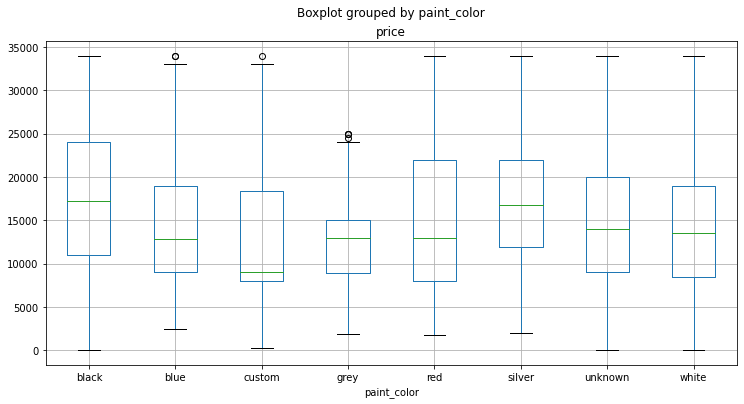

In [ ]:
#Trazamos diagramas de caja sin valores atipicos

df_aux_grey = df_chev.loc[~((df_chev['paint_color']== "grey")&(df_chev['price']>= Q3_grey+1.5*IQR_grey))]
df_aux_grey.query('paint_color in @color_chev_list').boxplot(column = 'price', by = 'paint_color', figsize = (12, 6))




- Analizamos el precio por tipo de transmision para Chevrolet silverado

<AxesSubplot:title={'center':'price'}, xlabel='is_4wd'>

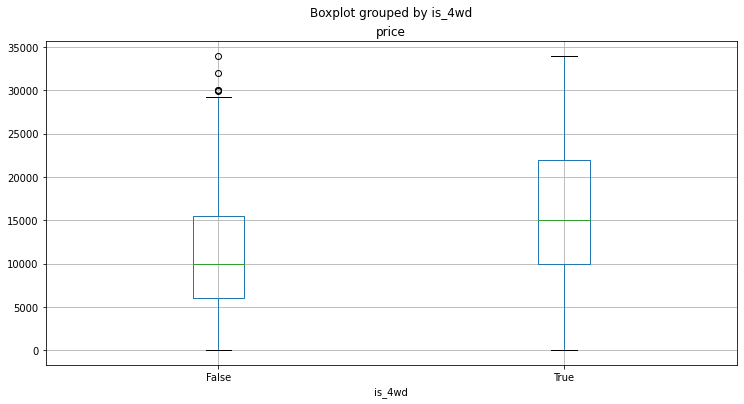

In [ ]:
df_chev.boxplot(column = 'price', by = 'is_4wd', figsize = (12, 6))

In [ ]:
##Calculamos limites rangos normalos para is_4wd False

df_is4wd_chev = df_chev.query('is_4wd == False')
Q2_is4wd_chev = df_is4wd_chev['price'].median()
Q1_is4wd_chev = df_is4wd_chev[df_is4wd_chev['price']<=Q2_is4wd_chev]['price'].median()
Q3_is4wd_chev = df_is4wd_chev[df_is4wd_chev['price']>=Q2_is4wd_chev]['price'].median()
IQR_is4wd_chev = Q3_is4wd_chev-Q1_is4wd_chev

print('Limite inferior Ford is4wd_chev False', max(0,Q1_is4wd_chev-1.5*IQR_is4wd_chev))
print('Limite superior Ford is4wd_chev False',Q3_is4wd_chev+1.5*IQR_is4wd_chev)


Limite inferior Ford is4wd_chev False 0
Limite superior Ford is4wd_chev False 29751.5


<AxesSubplot:title={'center':'price'}, xlabel='is_4wd'>

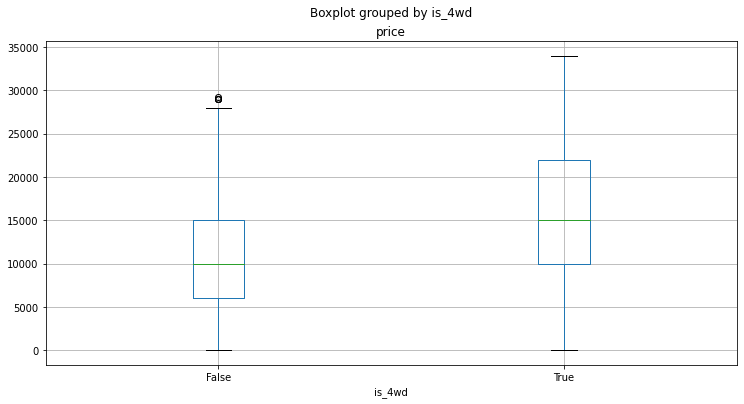

In [ ]:
#dibujamos diagrama de caja para valores normales


df_chev_false = df_chev.loc[~((df_chev['is_4wd']== False)&(df_chev['price']>= Q3_is4wd_chev+1.5*IQR_is4wd_chev))]
df_chev_false.boxplot(column = 'price', by = 'is_4wd', figsize = (12, 6))




- El modelo chevrolet silverado con transmision 4wd cuenta con un precio promedio superior a la version sin la misma 

## Conclusión general



-	El dataset original contaba con columnas cuyo tipo de dato no se correspondían a las variables contenidas en ellas. Se porcedio a corregir el tipo de datos de:
o	Date posted: del tipo string al tipo dayTIme
o	Model_year, cylinders y odometer: del tipo float al integer 
o	Is_4wd: del tipo float al tipo boolean
-	El dataset original contaba con valores ausentes en varias de sus columnas. Para el tratamiento de los mismo se procedió de la siguiente manera:
o	Is_4wd: se detectó que los valores ausentes correspondían a los valores “0” de la variable booleana por lo que se reemplazaron por dicho valor
o	Paint_color: los valores faltantes se reemplazaron por “unkown”
o	Cylinders: se calculó el promedio de cilindrada por tipo de modelo para rellenar los valores ausentes de dicha variable
o	Model_year: se calculó el promedio de antigüedad por tipo de modelo para rellenar los valores ausentes de dicha variable
o	Odometer: se calculó el promedio de odometer por tipo condición del vehículo para rellenar los valores ausentes de dicha variable
-	Al dataset original se le agregaron algunas columnas adicionales que resultaban de utilidad para el análisis de los datos: dia de la semana, mes y año en que se publicó el anuncio (‘weekday_posted’,’month_posted’, ‘year_posted’), años que tenía el vehículo cuando se publico (‘years_when_posted’), promedio de millaje según el año, id para la condición del vehículo (‘condition_id’)
-	Análisis de parámetros principales:
o	Se trazaron histogramas para cada uno de los parámetros principales: precio, años del vehículo cuando se publicó, millaje, cilindrada y estado
o	A partir de dichos histogramas se comprobó que las variables precio, años del vehículo cuando se publicó y millaje contaban con valores atípicos
o	Se calcularon los rangos de valores normales para las variables que presentaban valores atipicos y se almacenaron los datos SIN valores atipico en un nuevo dataframe: ‘df_filtered’
o	Se trazaron nuevos histogramas a partir de “df_filtered”, observándose que:
	El rango de precio más frecuente es el que va entre los 5.000 y los 10.000
	El millaje más común de los vehículos es el rango entre 100.000 y 150.000
	La mayoría de los vehículos tienen un estado ‘excelente’ y en segundo lugar un estado ‘bueno’
	La gran mayoría de los autos tienen una antigüedad menor a 12 años
	Cilindros: se distribuyen de manera pareja entre 4, 6 y 8 cilindros
o	Período de colocación de los anuncios: Al trazar histograma de este parámetro, se observan valores atípicos. Se calculan entonces los rangos normales y contemplando los mismo se vuelve a trazar histogramas, concluyéndose que:
	El período de colocación habitual es de 26,5 días
	Los anuncios que se publicaron por un tiempo anormalmente largo son aquellos que duraron más de 54 días son pero y los que se eliminaron muy rápido lo hicieron en el mismo día de publicados
	La cantidad de días de publicación habitualmente se distribuyen entre los 0 y 54 días con un pico de frecuencia cercano a los 20 días de duración 
o	Precio promedio para cada tipo de modelo de vehículo: se traza un gráfico de correlación entre dichos parámetros. Se determina los dos modelos con mayor cantidad de anuncios: Ford f-150 y Chevrolet silverado 1500

o	Factores de precio: se toman el caso de los dos tipos de modelo más populares mencionados en el punto anterior y se estudia la correlación del precio con distintas variables: millaje, antigüedad y condición utilizando gráficos  de correlación y matriz de correlación. A su vez se analizan las variables categóricas color de pintura y tipo de transmisión mediante diagramas de cajas (tomando solo aquellos que contienen más de 50 anuncios)

o	Caso Ford:
	Se detecta una correlación inversa relativamente fuerte entre el precio y la antigüedad (-0,67) y un poco menos fuerte entre el precio y el millaje (-0,48).
	La correlación entre el estado y el precio es positiva y bastante más leve que las anteriores (+o,35)
	AL analizar la variable categórica de color y tipo de transmisión, se detectan valores atípico en los colores custom y verde y en los vehículos sin 4wd. Se procede a eliminar los mismos y volver a trazar diagramas de cajas. Se concluye que:
•	El color que cuenta con una mediana de precio mayor es el negro y el que se vende mas barato es el verde
•	El grafico de cajas sin valores atípico permite concluir que aquellos vehículos de la marca ford con transmisión 4wd tienen una mediana de precio superior a la de aquellos que no la tienen (casi el doble )

o	Caso Chevrolet:
	Se detecta una correlación inversa fuerte entre el precio y la antigüedad (-0,75) y entre el precio y el millaje (-0,63). En ambos casos la correlación de variables es más fuerte que para el modelo Ford
	La correlación entre el estado y el precio es positiva y bastante más leve que las anteriores y parecida a la del modelo Ford (+0,32)
	AL analizar la variable categórica de color y tipo de transmisión, se detectan valores atípico en el color gris y en los vehículos sin 4wd. Se procede a eliminar los mismos y volver a trazar diagramas de cajas. Se concluye que:
•	El igual que en el modelo Ford, el color negro es el que cuenta con una mediana de precio mayor. El color customizado por su parte es el que tiene una mediana de precio menor para este modelo
•	LA versión de Chevrolet silverado con 4wd tiene un precio medio cerca de un 50% superior a la versión sin 
